In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = 'Stare//training'

In [3]:
images=glob.glob(os.path.join(PATH,'images','*.tif'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.gif'))
if not os.path.exists('./Stare/training/output_images'):
    os.makedirs('./Stare/training/output_images')
if not os.path.exists('./Stare/training/output_1st_manual'):
    os.makedirs('./Stare/training/output_1st_manual')
src = "./Stare/training/images/"
dst = "./Stare/training/output_images/"
src1= "./Stare/training/1st_manual/"
dst1 = "./Stare/training/output_1st_manual/"

In [4]:
cropheight=350
cropwidth = 350
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

Stare//training\images\41_training.tif (0, 0, 350, 350)
Stare//training\images\41_training.tif (0, 350, 350, 700)
Stare//training\images\41_training.tif (350, 0, 700, 350)
Stare//training\images\41_training.tif (350, 350, 700, 700)
Stare//training\images\42_training.tif (0, 0, 350, 350)
Stare//training\images\42_training.tif (0, 350, 350, 700)
Stare//training\images\42_training.tif (350, 0, 700, 350)
Stare//training\images\42_training.tif (350, 350, 700, 700)
Stare//training\images\43_training.tif (0, 0, 350, 350)
Stare//training\images\43_training.tif (0, 350, 350, 700)
Stare//training\images\43_training.tif (350, 0, 700, 350)
Stare//training\images\43_training.tif (350, 350, 700, 700)
Stare//training\images\44_training.tif (0, 0, 350, 350)
Stare//training\images\44_training.tif (0, 350, 350, 700)
Stare//training\images\44_training.tif (350, 0, 700, 350)
Stare//training\images\44_training.tif (350, 350, 700, 700)
Stare//training\images\45_training.tif (0, 0, 350, 350)
Stare//training\

In [5]:
cropheight=350
cropwidth = 350
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.TIF' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".TIF") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

Stare//training\1st_manual\41_manual1.gif (0, 0, 350, 350)
Stare//training\1st_manual\41_manual1.gif (0, 350, 350, 700)
Stare//training\1st_manual\41_manual1.gif (350, 0, 700, 350)
Stare//training\1st_manual\41_manual1.gif (350, 350, 700, 700)
Stare//training\1st_manual\42_manual1.gif (0, 0, 350, 350)
Stare//training\1st_manual\42_manual1.gif (0, 350, 350, 700)
Stare//training\1st_manual\42_manual1.gif (350, 0, 700, 350)
Stare//training\1st_manual\42_manual1.gif (350, 350, 700, 700)
Stare//training\1st_manual\43_manual1.gif (0, 0, 350, 350)
Stare//training\1st_manual\43_manual1.gif (0, 350, 350, 700)
Stare//training\1st_manual\43_manual1.gif (350, 0, 700, 350)
Stare//training\1st_manual\43_manual1.gif (350, 350, 700, 700)
Stare//training\1st_manual\44_manual1.gif (0, 0, 350, 350)
Stare//training\1st_manual\44_manual1.gif (0, 350, 350, 700)
Stare//training\1st_manual\44_manual1.gif (350, 0, 700, 350)
Stare//training\1st_manual\44_manual1.gif (350, 350, 700, 700)
Stare//training\1st_manu

In [6]:
PATH1 = 'Stare//training'

In [7]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.TIF'))

In [8]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [9]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [10]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(72, 128, 128)

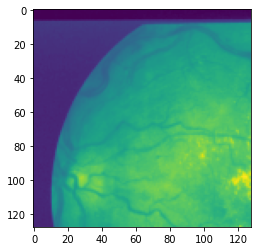

In [11]:
plt.imshow(orig_images[0])

In [12]:
masks=np.array([get_data(path) for path in mask])
masks.shape

(72, 128, 128)

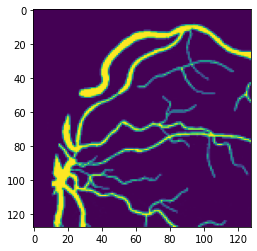

In [13]:
plt.imshow(masks[0])

In [14]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [15]:
masks.shape, orig_images.shape

((72, 128, 128, 1), (72, 128, 128, 1))

In [16]:
orig_images = orig_images / 255
masks = masks / 255

In [17]:
def get_unet():
    inputs = Input((128, 128, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [18]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_2[0][0]                  

In [19]:
model.fit(orig_images, masks, epochs = 500, batch_size= 16, shuffle = True, validation_split = 0.1)

Train on 64 samples, validate on 8 samples
Epoch 1/500
64/64 [==============================] - 18s 289ms/step - loss: 0.6649 - accuracy: 0.7789 - val_loss: 0.6589 - val_accuracy: 0.7971
Epoch 2/500
64/64 [==============================] - 15s 239ms/step - loss: 0.6502 - accuracy: 0.7849 - val_loss: 0.6439 - val_accuracy: 0.7971
Epoch 3/500
64/64 [==============================] - 16s 243ms/step - loss: 0.6326 - accuracy: 0.7849 - val_loss: 0.6230 - val_accuracy: 0.7971
Epoch 4/500
64/64 [==============================] - 15s 237ms/step - loss: 0.6058 - accuracy: 0.7849 - val_loss: 0.5869 - val_accuracy: 0.7971
Epoch 5/500
64/64 [==============================] - 16s 246ms/step - loss: 0.5543 - accuracy: 0.7849 - val_loss: 0.4975 - val_accuracy: 0.7971
Epoch 6/500
64/64 [==============================] - 16s 252ms/step - loss: 0.4388 - accuracy: 0.7849 - val_loss: 0.3597 - val_accuracy: 0.7971
Epoch 7/500
64/64 [==============================] - 15s 240ms/step - loss: 0.4088 - accuracy

64/64 [==============================] - 18s 282ms/step - loss: 0.2163 - accuracy: 0.7849 - val_loss: 0.2000 - val_accuracy: 0.7971
Epoch 58/500
64/64 [==============================] - 17s 267ms/step - loss: 0.2164 - accuracy: 0.7849 - val_loss: 0.2015 - val_accuracy: 0.7971
Epoch 59/500
64/64 [==============================] - 19s 293ms/step - loss: 0.2162 - accuracy: 0.7849 - val_loss: 0.1999 - val_accuracy: 0.7971
Epoch 60/500
64/64 [==============================] - 18s 283ms/step - loss: 0.2160 - accuracy: 0.7849 - val_loss: 0.2004 - val_accuracy: 0.7971
Epoch 61/500
64/64 [==============================] - 17s 273ms/step - loss: 0.2160 - accuracy: 0.7849 - val_loss: 0.1998 - val_accuracy: 0.7971
Epoch 62/500
64/64 [==============================] - 19s 303ms/step - loss: 0.2156 - accuracy: 0.7849 - val_loss: 0.2006 - val_accuracy: 0.7971
Epoch 63/500
64/64 [==============================] - 18s 284ms/step - loss: 0.2153 - accuracy: 0.7849 - val_loss: 0.1990 - val_accuracy: 0.797

64/64 [==============================] - 17s 272ms/step - loss: 0.2026 - accuracy: 0.7849 - val_loss: 0.1931 - val_accuracy: 0.7971
Epoch 114/500
64/64 [==============================] - 17s 270ms/step - loss: 0.2016 - accuracy: 0.7849 - val_loss: 0.1919 - val_accuracy: 0.7971
Epoch 115/500
64/64 [==============================] - 17s 272ms/step - loss: 0.2012 - accuracy: 0.7849 - val_loss: 0.1936 - val_accuracy: 0.7971
Epoch 116/500
64/64 [==============================] - 18s 284ms/step - loss: 0.2022 - accuracy: 0.7849 - val_loss: 0.1921 - val_accuracy: 0.7971
Epoch 117/500
64/64 [==============================] - 18s 275ms/step - loss: 0.2006 - accuracy: 0.7849 - val_loss: 0.1909 - val_accuracy: 0.7971
Epoch 118/500
64/64 [==============================] - 17s 272ms/step - loss: 0.1997 - accuracy: 0.7849 - val_loss: 0.1897 - val_accuracy: 0.7971
Epoch 119/500
64/64 [==============================] - 19s 293ms/step - loss: 0.1989 - accuracy: 0.7849 - val_loss: 0.1918 - val_accuracy:

64/64 [==============================] - 19s 291ms/step - loss: 0.1426 - accuracy: 0.7872 - val_loss: 0.1454 - val_accuracy: 0.7988
Epoch 170/500
64/64 [==============================] - 18s 276ms/step - loss: 0.1414 - accuracy: 0.7873 - val_loss: 0.1423 - val_accuracy: 0.7984
Epoch 171/500
64/64 [==============================] - 18s 279ms/step - loss: 0.1418 - accuracy: 0.7873 - val_loss: 0.1429 - val_accuracy: 0.7989
Epoch 172/500
64/64 [==============================] - 19s 300ms/step - loss: 0.1419 - accuracy: 0.7868 - val_loss: 0.1476 - val_accuracy: 0.7989
Epoch 173/500
64/64 [==============================] - 18s 276ms/step - loss: 0.1391 - accuracy: 0.7874 - val_loss: 0.1408 - val_accuracy: 0.7988
Epoch 174/500
64/64 [==============================] - 17s 268ms/step - loss: 0.1375 - accuracy: 0.7873 - val_loss: 0.1462 - val_accuracy: 0.7988
Epoch 175/500
64/64 [==============================] - 19s 297ms/step - loss: 0.1377 - accuracy: 0.7872 - val_loss: 0.1403 - val_accuracy:

64/64 [==============================] - 18s 280ms/step - loss: 0.1081 - accuracy: 0.7888 - val_loss: 0.1403 - val_accuracy: 0.7986
Epoch 226/500
64/64 [==============================] - 18s 288ms/step - loss: 0.1082 - accuracy: 0.7887 - val_loss: 0.1365 - val_accuracy: 0.7977
Epoch 227/500
64/64 [==============================] - 18s 281ms/step - loss: 0.1076 - accuracy: 0.7888 - val_loss: 0.1342 - val_accuracy: 0.7985
Epoch 228/500
64/64 [==============================] - 17s 270ms/step - loss: 0.1074 - accuracy: 0.7888 - val_loss: 0.1394 - val_accuracy: 0.7986
Epoch 229/500
64/64 [==============================] - 19s 292ms/step - loss: 0.1060 - accuracy: 0.7889 - val_loss: 0.1379 - val_accuracy: 0.7987
Epoch 230/500
64/64 [==============================] - 17s 273ms/step - loss: 0.1059 - accuracy: 0.7889 - val_loss: 0.1350 - val_accuracy: 0.7977
Epoch 231/500
64/64 [==============================] - 17s 265ms/step - loss: 0.1068 - accuracy: 0.7888 - val_loss: 0.1430 - val_accuracy:

64/64 [==============================] - 18s 277ms/step - loss: 0.0883 - accuracy: 0.7897 - val_loss: 0.1479 - val_accuracy: 0.7974
Epoch 282/500
64/64 [==============================] - 18s 280ms/step - loss: 0.0889 - accuracy: 0.7896 - val_loss: 0.1432 - val_accuracy: 0.7976
Epoch 283/500
64/64 [==============================] - 18s 284ms/step - loss: 0.0899 - accuracy: 0.7896 - val_loss: 0.1455 - val_accuracy: 0.7966
Epoch 284/500
64/64 [==============================] - 18s 279ms/step - loss: 0.0897 - accuracy: 0.7895 - val_loss: 0.1465 - val_accuracy: 0.7985
Epoch 285/500
64/64 [==============================] - 18s 277ms/step - loss: 0.0907 - accuracy: 0.7895 - val_loss: 0.1453 - val_accuracy: 0.7981
Epoch 286/500
64/64 [==============================] - 18s 281ms/step - loss: 0.0897 - accuracy: 0.7896 - val_loss: 0.1450 - val_accuracy: 0.7971
Epoch 287/500
64/64 [==============================] - 18s 279ms/step - loss: 0.0898 - accuracy: 0.7894 - val_loss: 0.1476 - val_accuracy:

64/64 [==============================] - 17s 271ms/step - loss: 0.0787 - accuracy: 0.7900 - val_loss: 0.1614 - val_accuracy: 0.7970
Epoch 338/500
64/64 [==============================] - 17s 260ms/step - loss: 0.0782 - accuracy: 0.7900 - val_loss: 0.1575 - val_accuracy: 0.7967
Epoch 339/500
64/64 [==============================] - 18s 283ms/step - loss: 0.0780 - accuracy: 0.7900 - val_loss: 0.1639 - val_accuracy: 0.7975
Epoch 340/500
64/64 [==============================] - 17s 267ms/step - loss: 0.0775 - accuracy: 0.7900 - val_loss: 0.1656 - val_accuracy: 0.7972
Epoch 341/500
64/64 [==============================] - 18s 279ms/step - loss: 0.0774 - accuracy: 0.7900 - val_loss: 0.1661 - val_accuracy: 0.7971
Epoch 342/500
64/64 [==============================] - 17s 272ms/step - loss: 0.0775 - accuracy: 0.7900 - val_loss: 0.1654 - val_accuracy: 0.7977
Epoch 343/500
64/64 [==============================] - 17s 272ms/step - loss: 0.0777 - accuracy: 0.7900 - val_loss: 0.1639 - val_accuracy:

64/64 [==============================] - 18s 274ms/step - loss: 0.0727 - accuracy: 0.7902 - val_loss: 0.1712 - val_accuracy: 0.7964
Epoch 394/500
64/64 [==============================] - 18s 284ms/step - loss: 0.0724 - accuracy: 0.7902 - val_loss: 0.1761 - val_accuracy: 0.7968
Epoch 395/500
64/64 [==============================] - 18s 278ms/step - loss: 0.0724 - accuracy: 0.7902 - val_loss: 0.1755 - val_accuracy: 0.7969
Epoch 396/500
64/64 [==============================] - 17s 272ms/step - loss: 0.0723 - accuracy: 0.7902 - val_loss: 0.1769 - val_accuracy: 0.7967
Epoch 397/500
64/64 [==============================] - 19s 290ms/step - loss: 0.0718 - accuracy: 0.7902 - val_loss: 0.1738 - val_accuracy: 0.7964
Epoch 398/500
64/64 [==============================] - 18s 275ms/step - loss: 0.0716 - accuracy: 0.7902 - val_loss: 0.1766 - val_accuracy: 0.7970
Epoch 399/500
64/64 [==============================] - 17s 271ms/step - loss: 0.0715 - accuracy: 0.7902 - val_loss: 0.1768 - val_accuracy:

64/64 [==============================] - 17s 268ms/step - loss: 0.0686 - accuracy: 0.7902 - val_loss: 0.1783 - val_accuracy: 0.7967
Epoch 450/500
64/64 [==============================] - 18s 282ms/step - loss: 0.0688 - accuracy: 0.7903 - val_loss: 0.1753 - val_accuracy: 0.7960
Epoch 451/500
64/64 [==============================] - 18s 279ms/step - loss: 0.0707 - accuracy: 0.7902 - val_loss: 0.1702 - val_accuracy: 0.7968
Epoch 452/500
64/64 [==============================] - 18s 278ms/step - loss: 0.0715 - accuracy: 0.7901 - val_loss: 0.1733 - val_accuracy: 0.7963
Epoch 453/500
64/64 [==============================] - 18s 284ms/step - loss: 0.0713 - accuracy: 0.7902 - val_loss: 0.1734 - val_accuracy: 0.7971
Epoch 454/500
64/64 [==============================] - 18s 278ms/step - loss: 0.0713 - accuracy: 0.7902 - val_loss: 0.1779 - val_accuracy: 0.7977
Epoch 455/500
64/64 [==============================] - 17s 270ms/step - loss: 0.0725 - accuracy: 0.7902 - val_loss: 0.1650 - val_accuracy:

In [20]:
PATH2 = 'Stare//test'

In [21]:
t_images=glob.glob(os.path.join(PATH2,'images','*.tif'))

In [22]:
if not os.path.exists('./Stare/test/output_images'):
    os.makedirs('./Stare/test/output_images')
src = "./Stare/test/images/"
dst = "./Stare/test/output_images/"

In [23]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

Stare//test\images\59_training.tif (0, 0, 350, 350)
Stare//test\images\59_training.tif (0, 350, 350, 700)
Stare//test\images\59_training.tif (350, 0, 700, 350)
Stare//test\images\59_training.tif (350, 350, 700, 700)
Stare//test\images\60_training.tif (0, 0, 350, 350)
Stare//test\images\60_training.tif (0, 350, 350, 700)
Stare//test\images\60_training.tif (350, 0, 700, 350)
Stare//test\images\60_training.tif (350, 350, 700, 700)


In [24]:
PATH3 = 'Stare//test'

In [25]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [26]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(8, 128, 128)

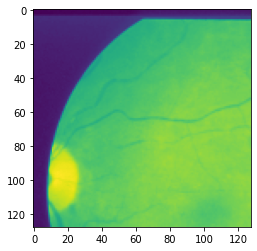

In [27]:
plt.imshow(test_images[0])

In [28]:
test_images = np.expand_dims(test_images, axis = -1)

In [29]:
test_images.shape

(8, 128, 128, 1)

In [30]:
test_images = test_images / 255

In [31]:
imgs_mask_test = model.predict(test_images, verbose=1)

8/8 [==============================] - 2s 209ms/step


In [32]:
#count=0
#idx=0
#DIR="C:\\Users\\subah\\retinaunetdrivecrop\\test\\predicted_masks"
#for i in os.listdir(DIR):
    #image=cv2.imread(os.path.join(DIR, i))
    #blurred_image = motion_blur(image)
    #cv2.imwrite('/path/to/destination/image'+str(count)+'.png',blurred_image) 
    #count+=1
    #i = imgs_mask_test[idx]
    #i = i[:, :, 0]
    #i.shape
    #plt.imshow(imgs_mask_test[idx], cmap='gray')
    #plt.imshow(i, cmap='gray')
    #Image.fromarray(np.uint8(cm.gist_earth(imgs_mask_test[idx])))
    #plt.imshow(imgs_mask_test[idx], cmap='gray')

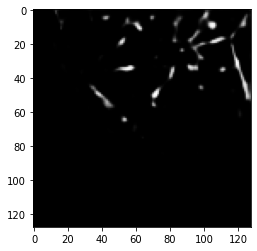

In [33]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [34]:
yp = np.round(imgs_mask_test,0)

In [35]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

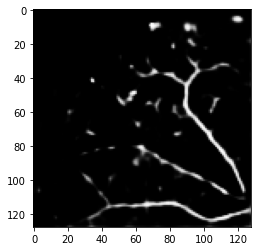

In [36]:
plt.imshow(i, cmap='gray')
